# REST API 

The first part of the assigment is to fetch data in JSON format with information on the Nobel prizes in physics 

In [2]:
import requests

# Step 3: Define the API endpoint
api_url = 'http://api.nobelprize.org/2.1/nobelPrize/phy/2022'

# Step 4: Make the GET request
response = requests.get(api_url)

# Step 5: Check for successful response
if response.status_code == 200:
    # Step 6: Process the JSON data
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}")
    

    
            
print(response.headers)

[{'awardYear': '2022', 'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}, 'categoryFullName': {'en': 'The Nobel Prize in Physics', 'no': 'Nobelprisen i fysikk', 'se': 'Nobelpriset i fysik'}, 'dateAwarded': '2022-10-04', 'prizeAmount': 10000000, 'prizeAmountAdjusted': 10000000, 'links': [{'rel': 'nobelPrize', 'href': 'https://api.nobelprize.org/2/nobelPrize/phy/2022', 'action': 'GET', 'types': 'application/json'}], 'laureates': [{'id': '1012', 'knownName': {'en': 'Alain Aspect'}, 'fullName': {'en': 'Alain Aspect'}, 'portion': '1/3', 'sortOrder': '1', 'motivation': {'en': 'for experiments with entangled photons, establishing the violation of Bell inequalities and  pioneering quantum information science', 'se': 'för experiment med sammanfätade fotoner som påvisat brott mot Bell-olikheter och  banat väg för kvantinformationsvetenskap'}, 'links': [{'rel': 'laureate', 'href': 'https://api.nobelprize.org/2/laureate/1012', 'action': 'GET', 'types': 'application/json'}]}, {'id': '101

By using the retrieved data, I am going to extract and visualise the prize motivations and its frequencies.  

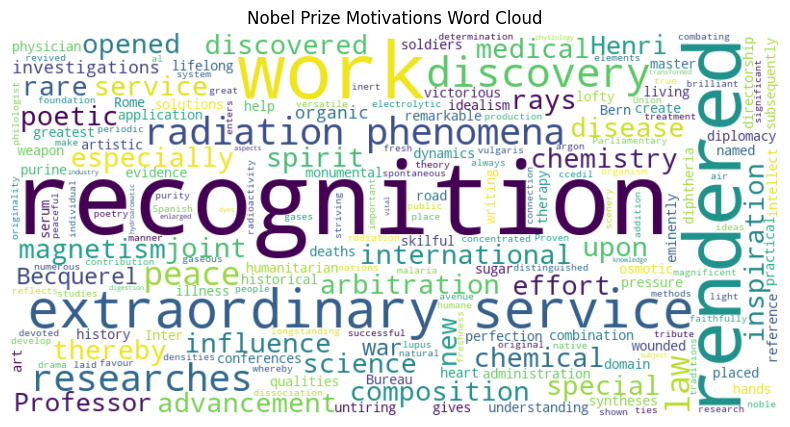

In [6]:

import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

api_url = 'https://api.nobelprize.org/2.1/nobelPrizes?category=phy'
response = requests.get(api_url)

if response.status_code == 200:
    #  Process the JSON data
    data = response.json()

    #  Extract prize motivations
    motivations = []
    for prize_info in data['nobelPrizes']:
        for laureate_info in prize_info.get('laureates', []):
            motivation = laureate_info.get('motivation', {}).get('en', '')  # Extracting motivation text
            motivations.append(motivation)

    # Combine motivations into a single string
    motivations_text = ' '.join(motivations)

    #  Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(motivations_text)

    # Visualize the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nobel Prize Motivations Word Cloud')
    plt.show()

else:
    print(f"Error: {response.status_code}")
    # Handle potential error 



The code retrieves information from the Nobel Prize API, extracts the motivations for the awards, and plots a word cloud based on these motivations. These texts are combined into a single string and passed to the WordCloud library to create a visual picture of the most frequently occurring words in the motivations.








# Web Scraping 

The next task is to scrape data from the book-site

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Function to scrape book information from a given book URL
def scrape_book_details(book_url):
    response = requests.get(book_url)
    if response.status_code != 200:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None
    
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract UPC from the book details page
    upc = soup.find('th', string='UPC').find_next('td').text.strip()

    return upc

# Function to scrape information, including URL and UPC, from a given page URL
def scrape_books_and_details(url):
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None
    
    soup = BeautifulSoup(response.content, 'html.parser')
    books_and_details = []

    for article in soup.find_all('article', class_='product_pod'):
        # Extract the URL for each book
        book_url = article.h3.a['href']
        full_url = url.rsplit('/', 1)[0] + '/' + book_url

        # Extract the UPC from the individual book's page
        upc = scrape_book_details(full_url)

        title = article.h3.a['title']
        price = article.select('div p.price_color')[0].text
        rating_class = article.select_one('p.star-rating')['class'][1].lower()

        books_and_details.append({'upc': upc, 'title': title, 'price': price, 'rating': rating_class})

    return books_and_details

# URL pattern for the pages
base_url = "https://books.toscrape.com/catalogue/page-{}.html"

# Scrape information, including URLs and UPCs, from the first three pages
all_books_and_details = []
for page_number in range(1, 4):
    url = base_url.format(page_number)
    books_and_details_on_page = scrape_books_and_details(url)
    if books_and_details_on_page:
        all_books_and_details.extend(books_and_details_on_page)

# Create a DataFrame
df_2 = pd.DataFrame(all_books_and_details)
print(df_2.head())



                upc                                  title   price rating
0  a897fe39b1053632                   A Light in the Attic  £51.77  three
1  90fa61229261140a                     Tipping the Velvet  £53.74    one
2  6957f44c3847a760                             Soumission  £50.10    one
3  e00eb4fd7b871a48                          Sharp Objects  £47.82   four
4  4165285e1663650f  Sapiens: A Brief History of Humankind  £54.23   five


The scraping starts by defining HTTP headers to mimic a browser's request. Thereafter, two functions is defined. The first function, scrape_book_details, takes a  URL as input, sends an HTTP GET request to fetch the book's webpage, and uses BeautifulSoup to scrap. It extracts the book's UPC  by locating a specific table cell based on the HTML structure and returning the retrieved value. 

The second function, scrape_books_and_details, processes a page of books, extracting each book's URL, title, price, and rating, and uses scrape_book_details to fetch the UPC for each book

Therafter, it iterates over the first three pages of the website using a for loop, constructing the URLs for each page. For each page, it calls scrape_books_and_details to gather details about all books on that page and aggregates the results into a single list, all_books_and_details.

Finally, the script creates a pandas DataFrame from the collected book details, displaying the table according to instructions